# Let us read multiple csv files, one for each month.
# Then put them all in one single dataframe.

In [2]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
files = [files for files in os.listdir("Part B/Raw data") if files.endswith('.csv')]
files = sorted(files)
columns = pd.read_csv(f'Part B/Raw data/{files[0]}').columns.tolist()
print("columns: ",columns)
# Read all CSV files and concatenate them into a single DataFrame

rawdata = pd.DataFrame()
for file in files:
  data = pd.read_csv(f"Part B/Raw data/{file}")
  data.columns = columns
  rawdata = pd.concat([rawdata, data], ignore_index=True)

df = rawdata.copy()

# Create a datetime index from year, month, and day columns
df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']]), inplace=True)
df.sort_index(inplace=True)



columns:  ['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']


In [4]:
df

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-01-01,Changi,1980,1,1,0.0,—,—,—,—,—,—,—,—
1980-01-02,Changi,1980,1,2,0.0,—,—,—,—,—,—,—,—
1980-01-03,Changi,1980,1,3,0.0,—,—,—,—,—,—,—,—
1980-01-04,Changi,1980,1,4,0.0,—,—,—,—,—,—,—,—
1980-01-05,Changi,1980,1,5,8.0,—,—,—,—,—,—,—,—
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,Changi,2025,1,27,11.0,3.6,4.4,6.4,25.3,29.5,23.2,12.9,40.7
2025-01-28,Changi,2025,1,28,0.0,0.0,0.0,0.0,26.6,29.6,25.3,20.7,51.9
2025-01-29,Changi,2025,1,29,0.0,0.0,0.0,0.0,26.4,29.2,24.9,20.1,57.4
2025-01-30,Changi,2025,1,30,0.0,0.0,0.0,0.0,26.6,30.3,24.1,17.1,51.9


In [5]:
# Replace '—' and '-' with NaN
df = df.replace(['-'], np.nan)

# Convert columns to float except for "Station", "Year", "Month", and "Day"
for col in df.columns:
    if col not in ["Station", "Year", "Month", "Day"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the head and tail of the dataframe
display(df.head())
display(df.tail())



,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-01-01,Changi,1980,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,Changi,1980,1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,Changi,1980,1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,Changi,1980,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,Changi,1980,1,5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
2025-01-27,Changi,2025,1,27,11.0,3.6,4.4,6.4,25.3,29.5,23.2,12.9,40.7
2025-01-28,Changi,2025,1,28,0.0,0.0,0.0,0.0,26.6,29.6,25.3,20.7,51.9
2025-01-29,Changi,2025,1,29,0.0,0.0,0.0,0.0,26.4,29.2,24.9,20.1,57.4
2025-01-30,Changi,2025,1,30,0.0,0.0,0.0,0.0,26.6,30.3,24.1,17.1,51.9
2025-01-31,Changi,2025,1,31,0.0,0.0,0.0,0.0,26.4,30.4,23.4,16.9,44.4


In [6]:
df.describe()

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
count,16468.000000,16468.000000,16468.000000,16468.000000,4043.000000,4042.000000,4042.000000,15737.000000,15737.000000,15737.000000,15360.000000,15353.000000
mean,2002.043296,6.512327,15.730751,5.846897,3.124338,3.876917,4.425111,27.706443,31.544227,24.965832,7.677689,34.107627
std,13.014200,3.453923,8.800896,14.483865,6.686498,8.551430,9.861426,1.181226,1.577368,1.286596,3.514286,7.956363
min,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.800000,23.600000,20.200000,0.200000,4.700000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,26.900000,30.800000,24.000000,5.100000,28.800000
50%,2002.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,27.700000,31.800000,24.900000,7.100000,33.100000
75%,2013.000000,10.000000,23.000000,4.400000,2.600000,3.000000,3.600000,28.600000,32.600000,25.800000,9.900000,38.500000
max,2025.000000,12.000000,31.000000,216.200000,63.400000,81.600000,85.600000,30.900000,36.000000,29.100000,22.400000,90.700000


# ***Very basic*** EDA.

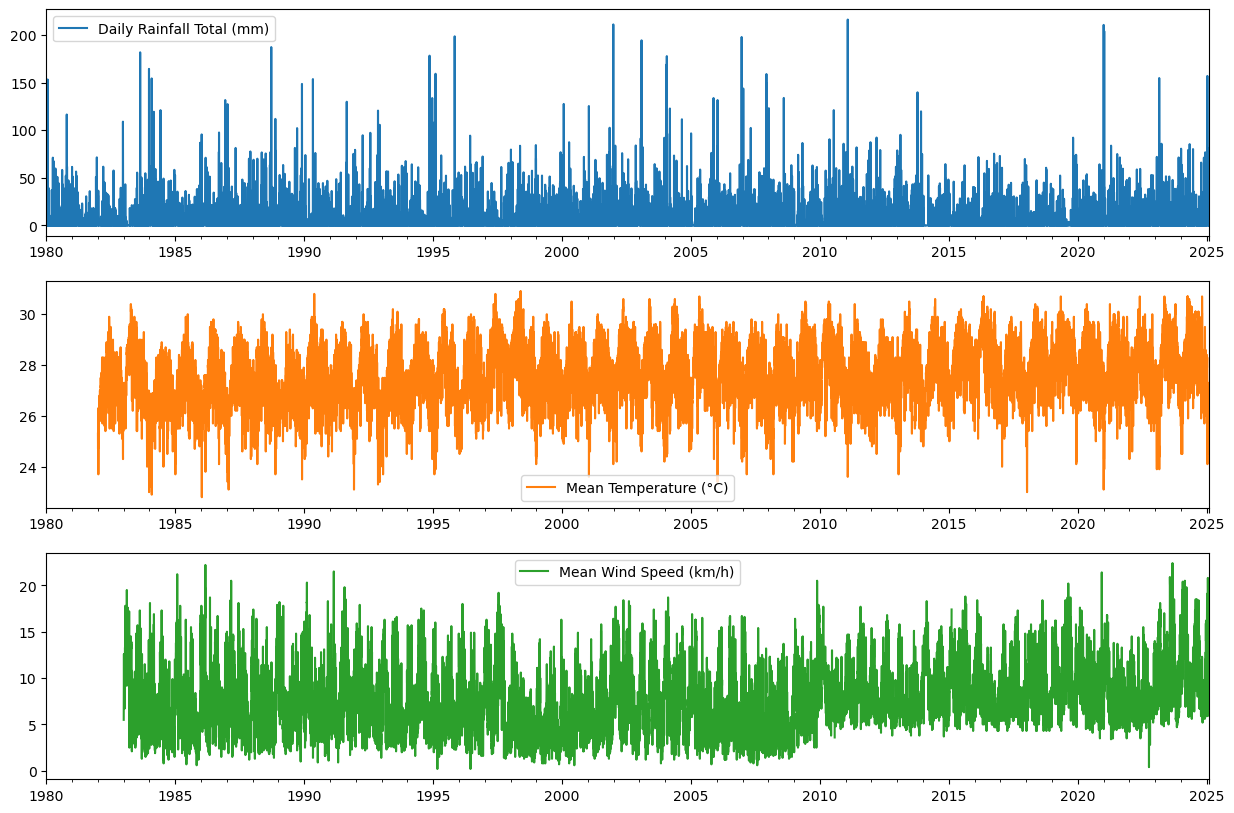

In [7]:
# Some plots of the raw data.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

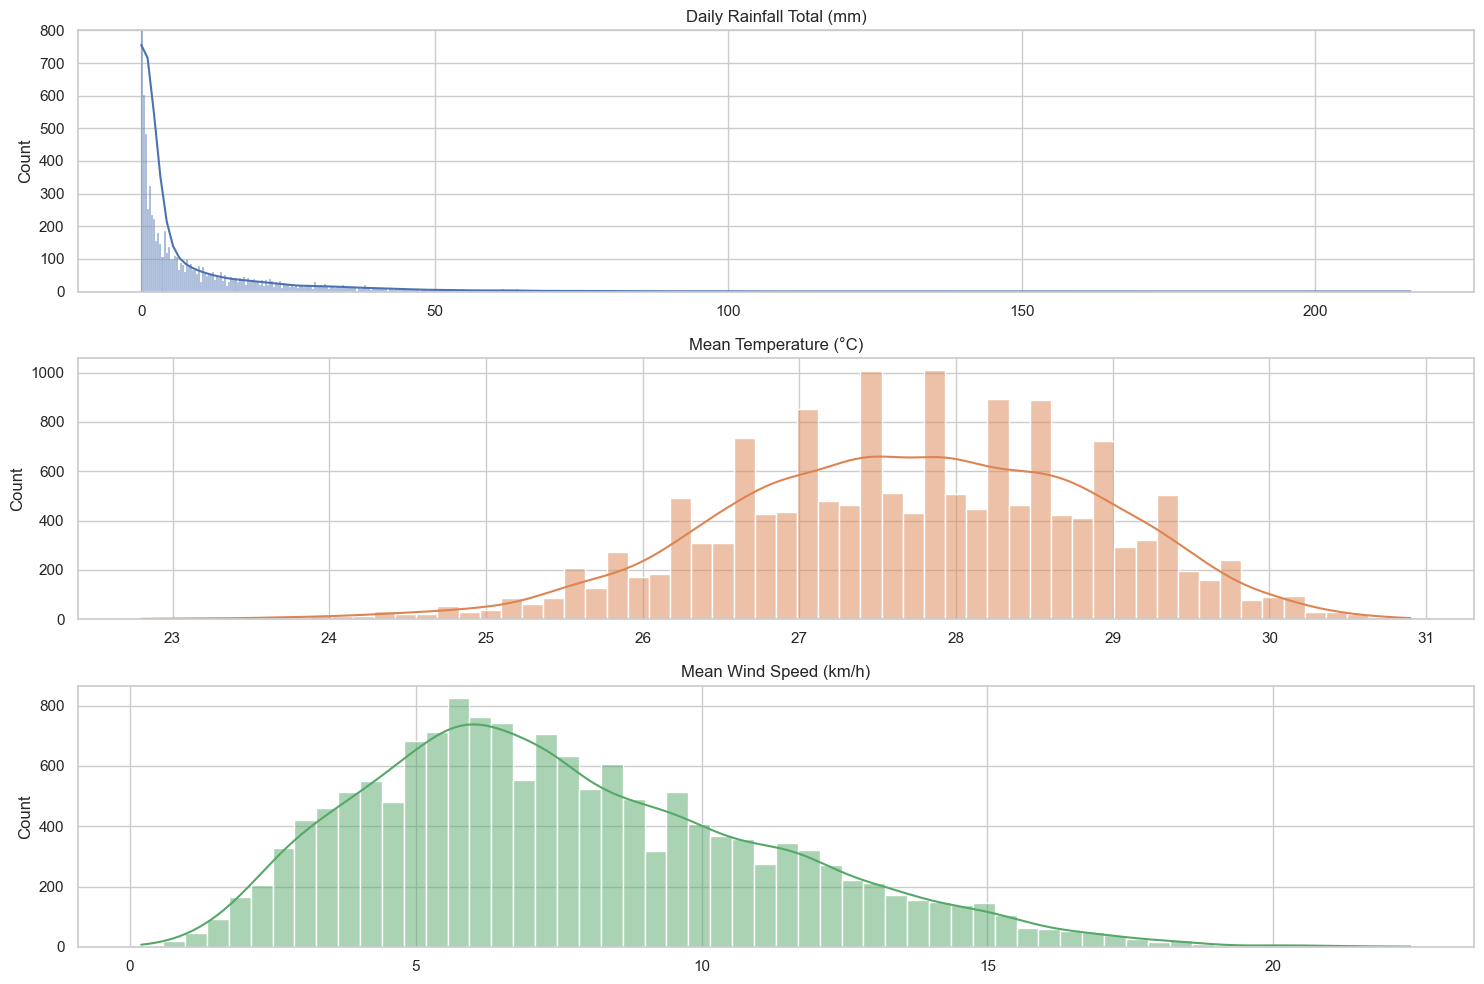

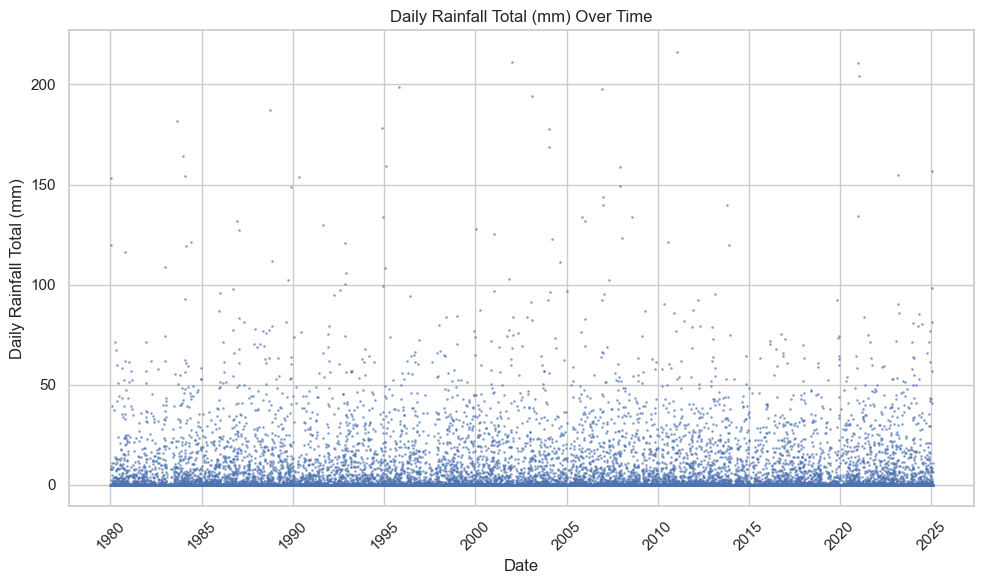

In [8]:
# histograms and kde of the raw data
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
sns.histplot(df['Daily Rainfall Total (mm)'].dropna().to_numpy(), kde=True, ax=ax[0], color='C0')
sns.histplot(df['Mean Temperature (°C)'].dropna().to_numpy(), kde=True, ax=ax[1], color='C1')
sns.histplot(df['Mean Wind Speed (km/h)'].dropna().to_numpy(), kde=True, ax=ax[2], color='C2')
ax[0].set_title('Daily Rainfall Total (mm)')
ax[1].set_title('Mean Temperature (°C)')
ax[2].set_title('Mean Wind Speed (km/h)')
ax[0].set_ylim(0, 800)
plt.tight_layout()
plt.show()

# scatter polt of the "Daily Rainfall Total (mm)" columns
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Daily Rainfall Total (mm)'], s=1, alpha=0.5)
plt.title('Daily Rainfall Total (mm) Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Rainfall Total (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# How about resampling, would that smoothen out the fluctuations?
# Or how about looking within a smaller time frame?

# Let us try smaller time frame first, this is easier.



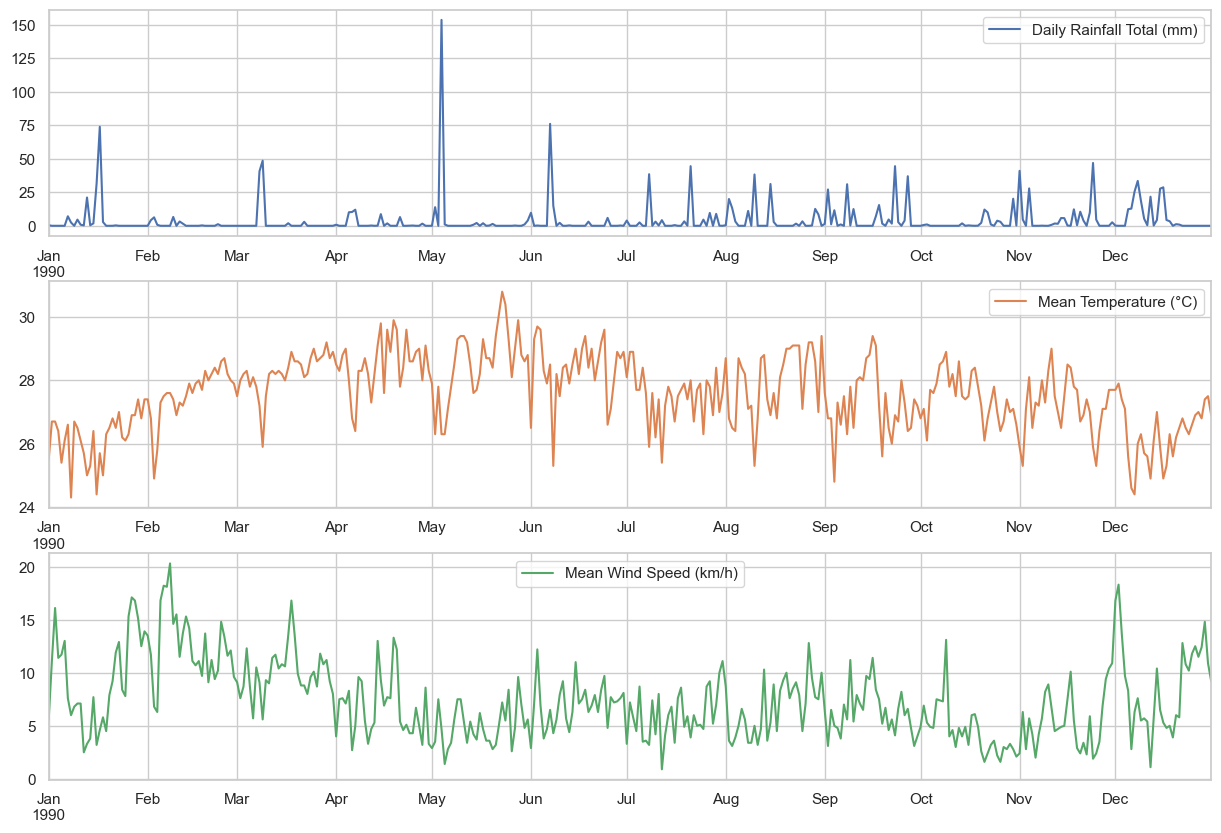

In [10]:
# Just one year.

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1990'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1990'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1990'].plot(ax=ax[2], c='C2')
plt.show()

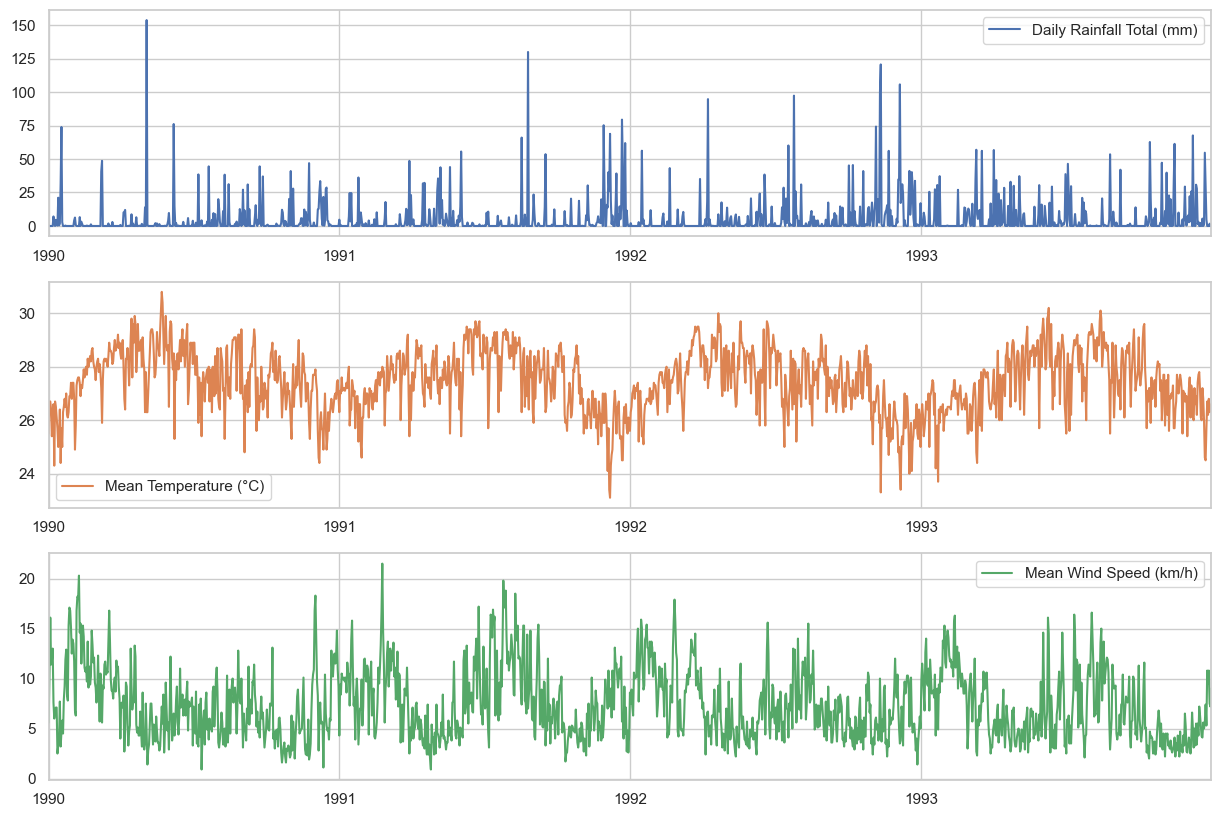

In [11]:
# How about over four years?
# Maybe ENSO? La Nini, El Nino southern oscillation? How often do they recur?

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df[['Daily Rainfall Total (mm)']]['1990':'1993'].plot(ax=ax[0])
df[['Mean Temperature (°C)']]['1990':'1993'].plot(ax=ax[1], c='C1')
df[['Mean Wind Speed (km/h)']]['1990':'1993'].plot(ax=ax[2], c='C2')
plt.show()

In [12]:
# So ... any insights?

# Fine, time for resampling.

In [13]:
df_weekly = df.resample('W').mean(numeric_only=True)
df_monthly = df.resample('ME').mean(numeric_only=True)

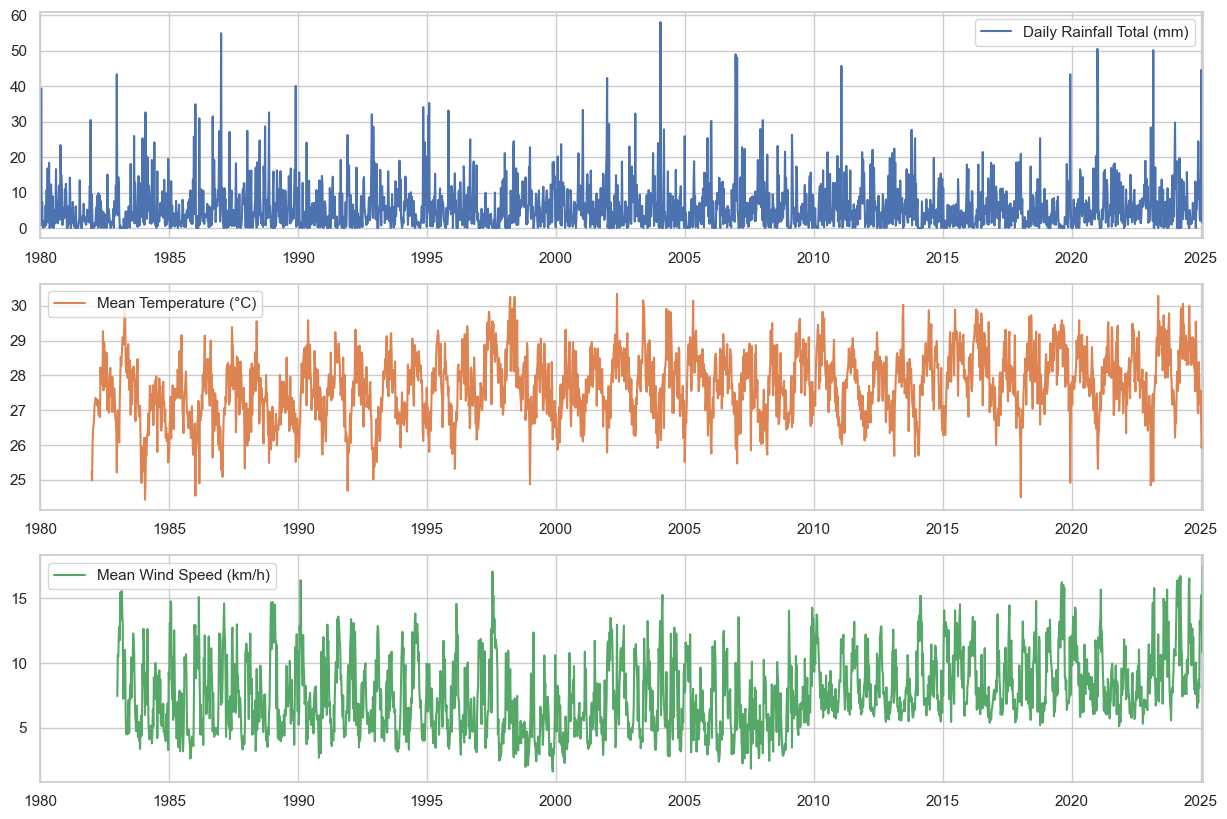

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

df_weekly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_weekly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_weekly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

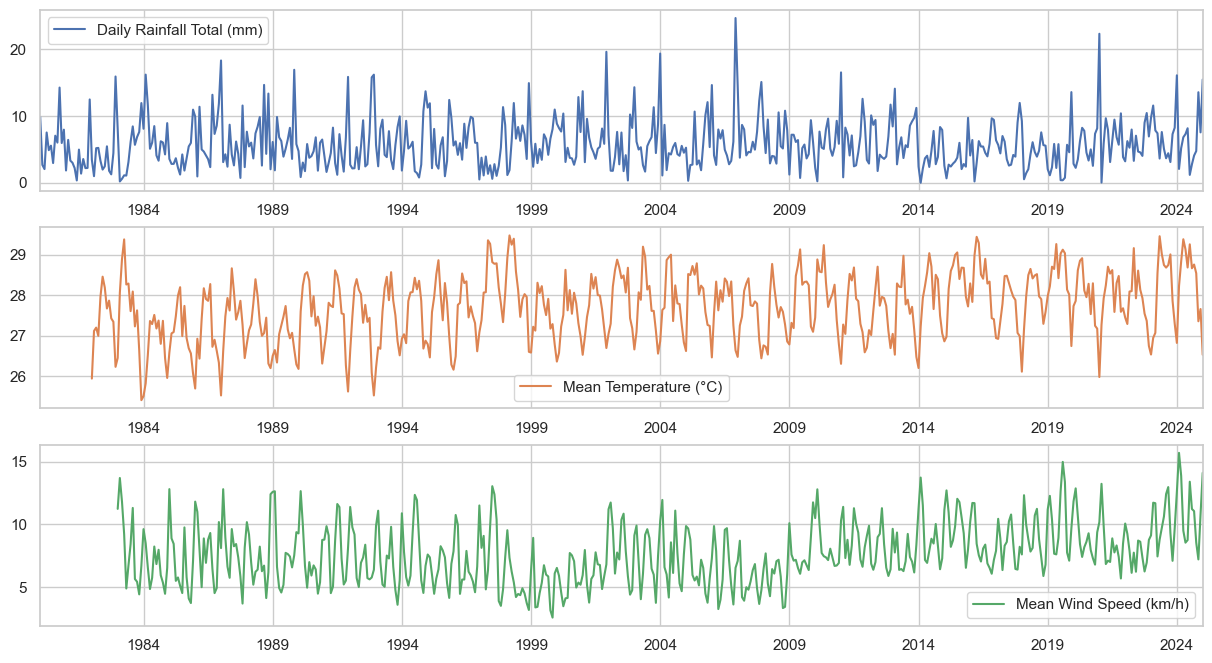

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

df_monthly[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df_monthly[['Mean Temperature (°C)']].plot(ax=ax[1], c='C1')
df_monthly[['Mean Wind Speed (km/h)']].plot(ax=ax[2], c='C2')
plt.show()

# Bonus ... taking diff of rainfall and plotting it ... visual check of stationarity.

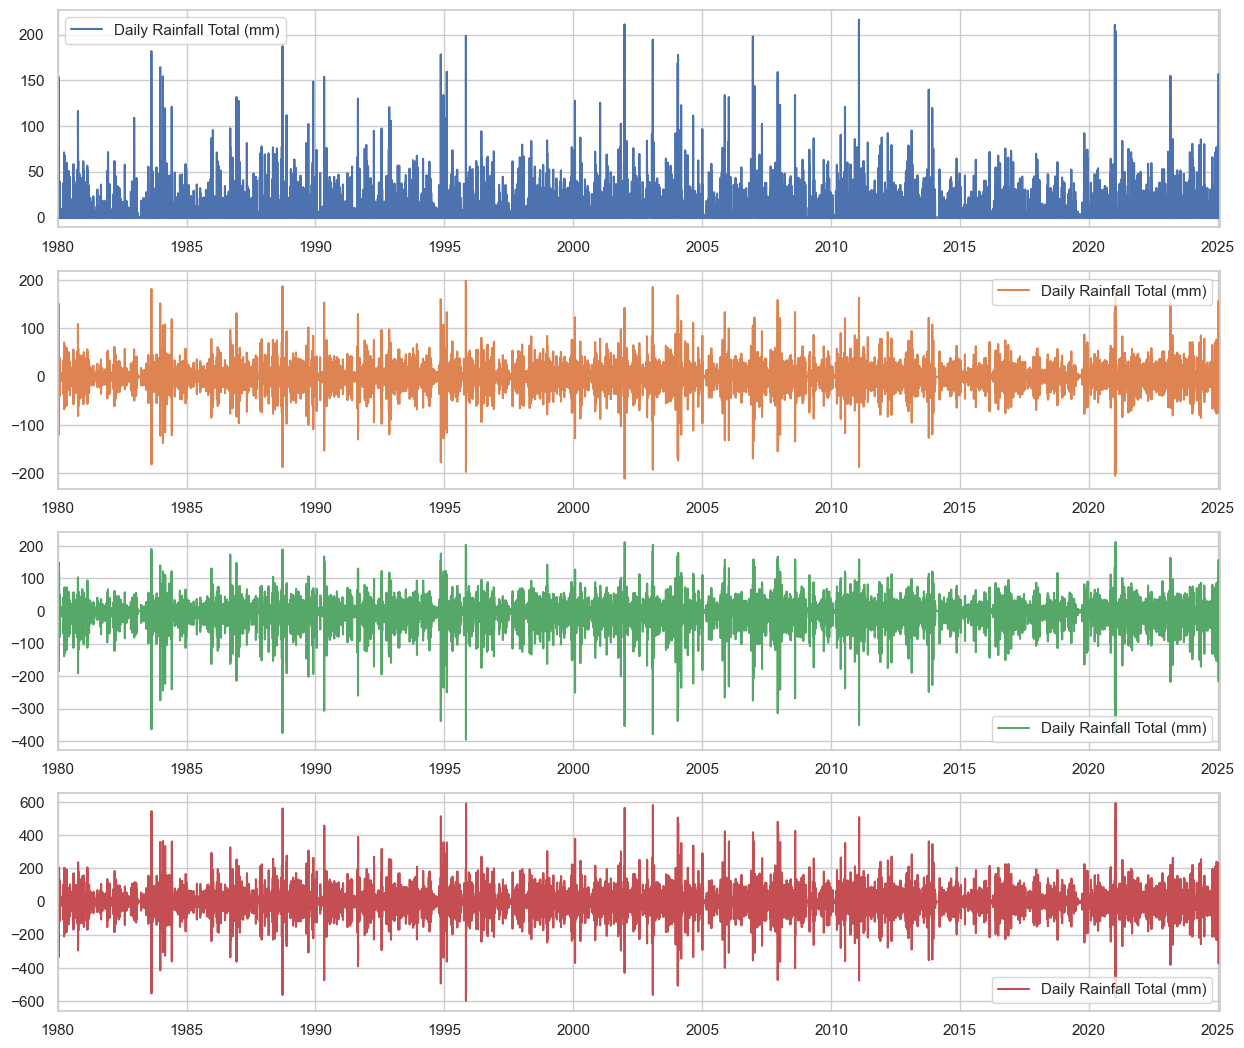

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(15, 13))
df[['Daily Rainfall Total (mm)']].plot(ax=ax[0])
df[['Daily Rainfall Total (mm)']].diff().plot(ax=ax[1], c='C1')
df[['Daily Rainfall Total (mm)']].diff().diff().plot(ax=ax[2], c='C2')
df[['Daily Rainfall Total (mm)']].diff().diff().diff().plot(ax=ax[3], c='C3')
plt.show()

# Of course, these are just plots. Do the relevant test!

# End of example starter code. Have fun!

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-01-01,Changi,1980,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,Changi,1980,1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,Changi,1980,1,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,Changi,1980,1,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,Changi,1980,1,5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.isna().sum()

Station                              0
Year                                 0
Month                                0
Day                                  0
Daily Rainfall Total (mm)            0
Highest 30 Min Rainfall (mm)     12425
Highest 60 Min Rainfall (mm)     12426
Highest 120 Min Rainfall (mm)    12426
Mean Temperature (°C)              731
Maximum Temperature (°C)           731
Minimum Temperature (°C)           731
Mean Wind Speed (km/h)            1108
Max Wind Speed (km/h)             1115
dtype: int64